In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import Bio.SeqUtils.MeltingTemp as mt

from dredFISH.Utils.__init__plots import *

In [2]:
def recalc_tm(seq, fmd=0, Na=1e-5, dnac1=0, dnac2=0):
    """
    """
    res = mt.Tm_NN(seq, Na=Na, dnac1=dnac1, dnac2=dnac2)
    res = mt.chem_correction(res, fmd=fmd)
    return res
    
def get_gc(seq):
    """
    """
    return (seq.count('G') + seq.count('C'))/len(seq)

In [3]:
ddir = "/bigstore/GeneralStorage/fangming/projects/dredfish/packages/PaintSHOP_pipeline/test3_chr1_fixl/" 
f = os.path.join(ddir, "pipeline_output/03_output_files/03_rna_probes_iso/mm10_iso_newBalance.tsv")
header=[
    'chrom', 'start', 'end', # one based?
    'seq', 
    'tm', 
    'onscore',  # 0-100
    'offscore', # 0-10,000
    'repeat',
    'prob',
    'maxkmer',
    'strand',
    'gname',
    'transcripts',
]

df = pd.read_csv(f, sep="\t", header=None)
df.columns = header
df['len'] = df['end']-df['start']+1
df['gc'] = df['seq'].apply(get_gc) 
df

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
0,chr1,3214521,3214550,TGACCAAGGACACCGAAAACAGAAAGCGGG,42.59,99.052,0.0,0,0.502,0,+,Xkr4,1,30,0.533333
1,chr1,3214634,3214663,AGCTGATGGAGTGGTAAGCCCTCAAGCAGT,42.83,98.987,0.0,0,0.279,0,+,Xkr4,1,30,0.533333
2,chr1,3214882,3214911,ATTTGGCACTCGAAAGATGTGGCACGTGGT,42.67,100.000,0.0,0,0.192,0,+,Xkr4,1,30,0.500000
3,chr1,3214924,3214953,ACCTGCTGACCCATGTCATTCTGCACCTGG,43.76,100.000,0.0,0,0.277,0,+,Xkr4,1,30,0.566667
4,chr1,3214993,3215022,TAGTCCCTGTTCCTCTCCTGTGGCTCTGTG,42.13,99.877,0.0,0,0.525,0,+,Xkr4,1,30,0.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52752,chr1,195163226,195163255,TCCCCACATTTCATTTGCCTGGCACCAGAC,42.88,98.869,0.0,0,0.279,2,+,Cr2,2,30,0.533333
52753,chr1,195163405,195163434,TAGGAGGAGCTTTATCCCAGGTGGCATGCA,42.60,96.557,0.0,1,0.281,0,+,Cr2,2,30,0.533333
52754,chr1,195176579,195176608,AAGAAAACCCAGAGCGAACCCAAGGATCCC,42.11,97.054,0.0,0,0.309,0,+,Cr2,2,30,0.533333
52755,chr1,195176609,195176638,ATGTGTGCAGCAGTCCAATGGCAGGTTGCG,45.07,99.682,0.0,0,0.272,0,+,Cr2,2,30,0.566667


In [4]:
assert np.all(df['len'] == 30)

dfnew = df.copy()
print(dfnew.shape)

cond = dfnew['repeat']==0
dfnew = dfnew[cond]
print(dfnew.shape)

cond = dfnew['offscore']<50 
dfnew = dfnew[cond]
print(dfnew.shape)

cond = dfnew['onscore']>97
dfnew = dfnew[cond]
print(dfnew.shape)

cond = dfnew['maxkmer']<=5
dfnew = dfnew[cond]
print(dfnew.shape)

cond = dfnew['prob']<=0.5
dfnew = dfnew[cond]
print(dfnew.shape)

(52757, 15)
(49758, 15)
(48018, 15)
(44544, 15)
(44486, 15)
(43689, 15)


<AxesSubplot:xlabel='prob', ylabel='Count'>

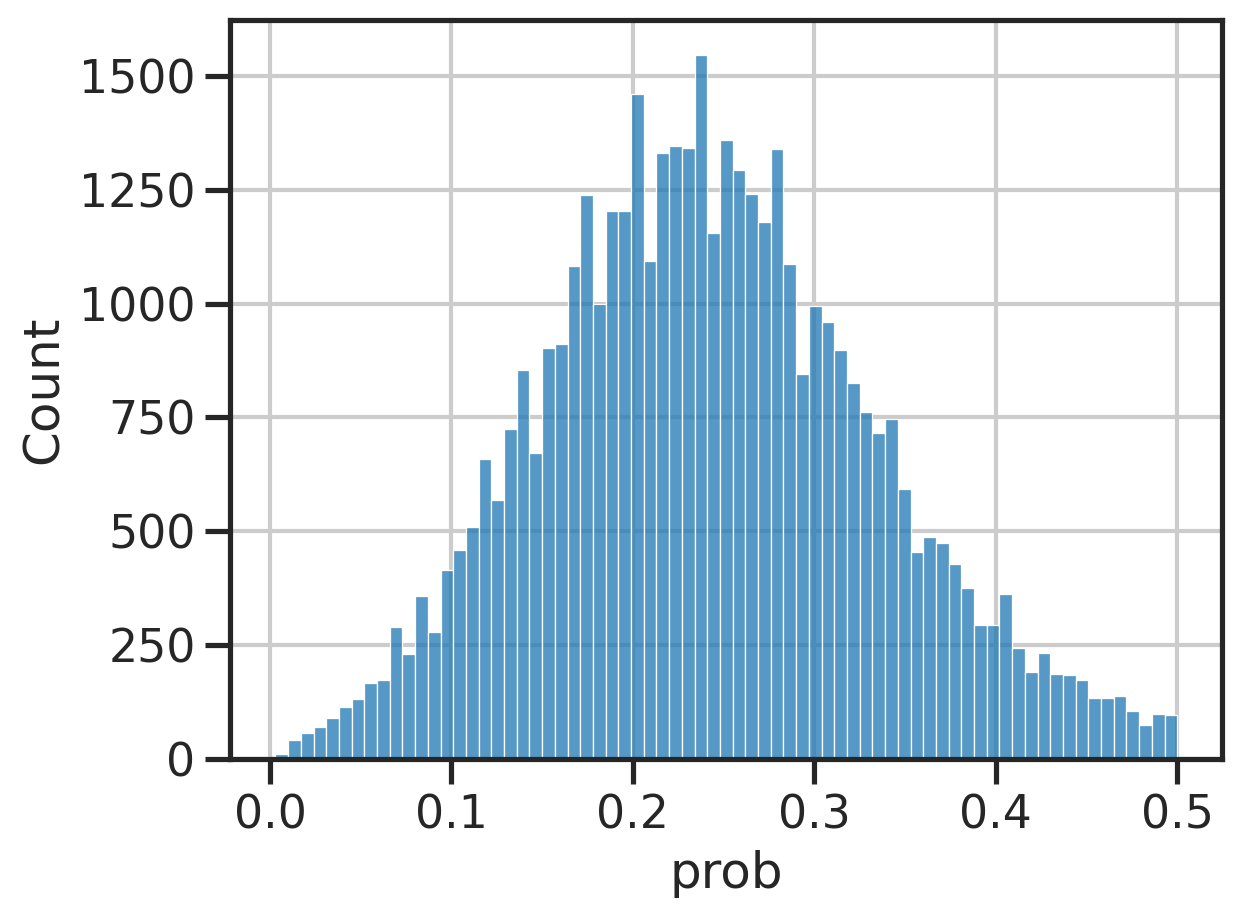

In [5]:
sns.histplot(dfnew['prob'])

Text(0, 0.5, 'max k-mer')

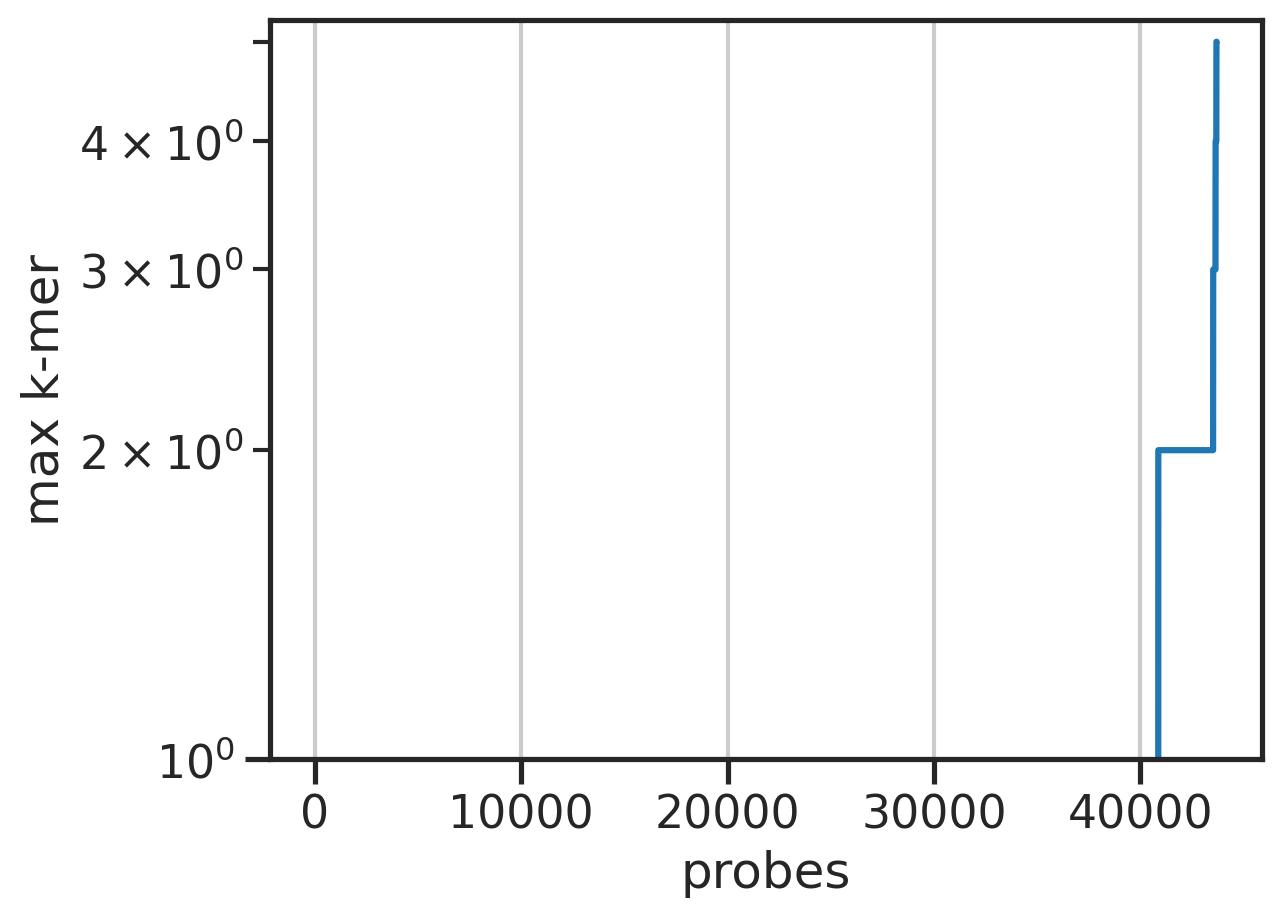

In [6]:
plt.plot(np.sort(dfnew['maxkmer']))
plt.ylim([1, None])
plt.yscale('log')
plt.xlabel('probes')
plt.ylabel('max k-mer')

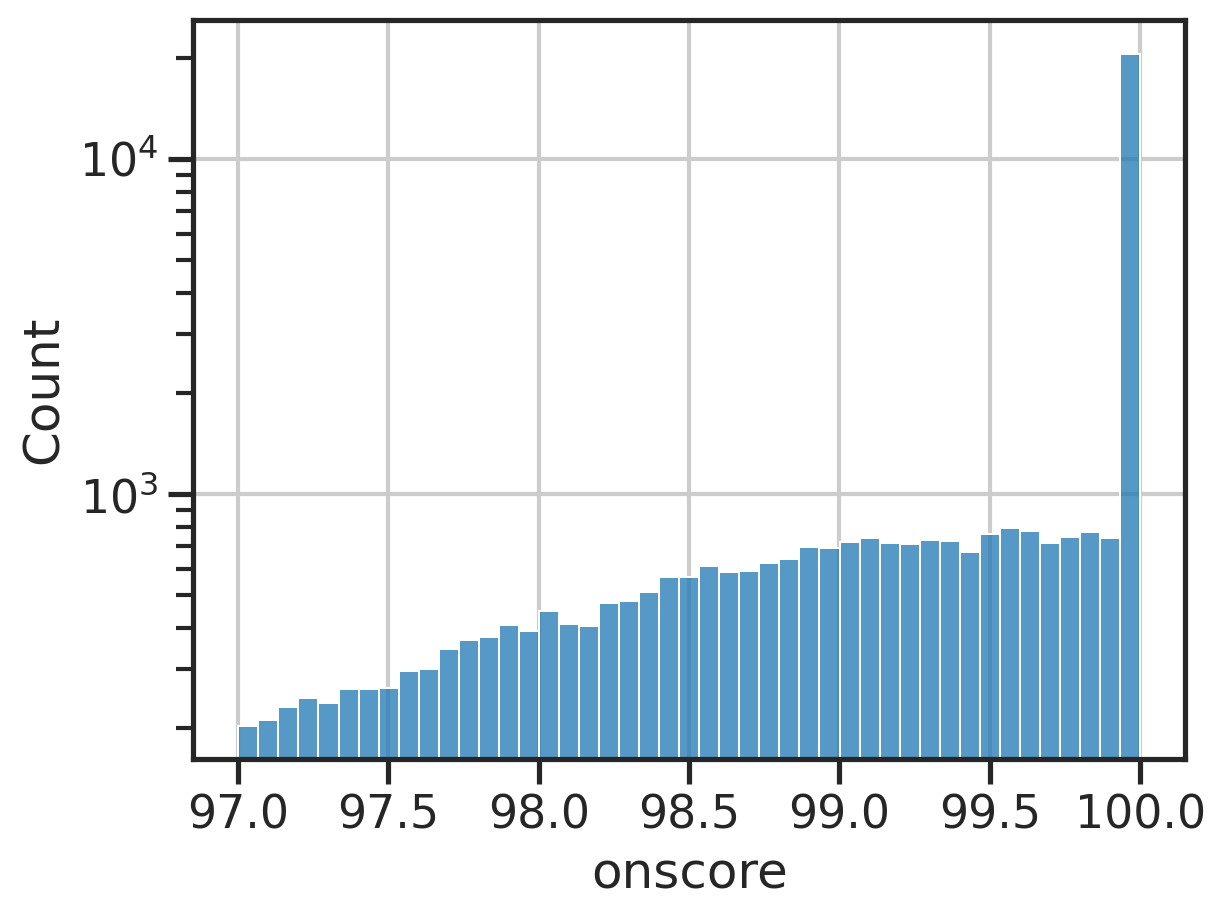

In [7]:
sns.histplot(dfnew['onscore'])
plt.yscale('log')

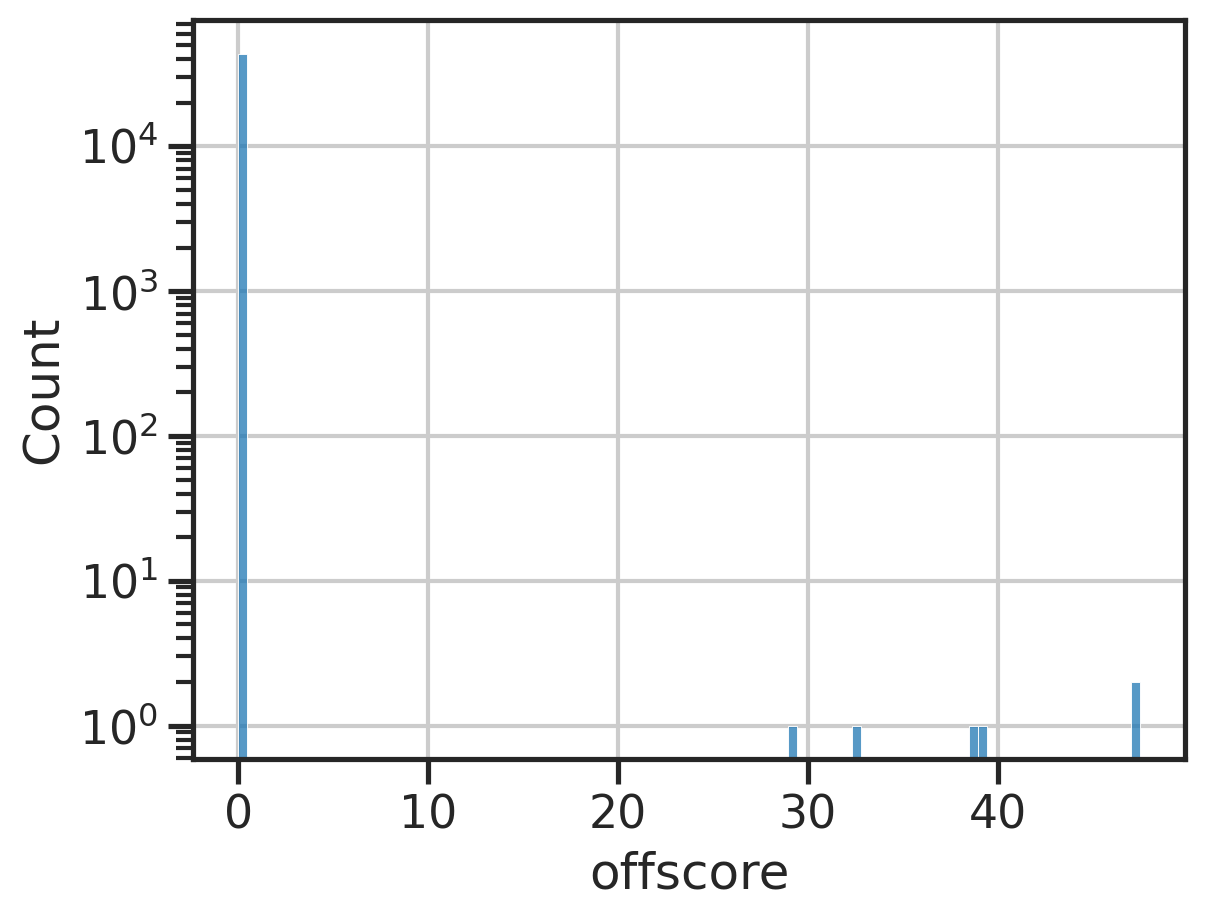

In [8]:
sns.histplot(dfnew['offscore'], bins=100) #, bins=np.arange(0, 1000, 10))
plt.yscale('log')

<AxesSubplot:xlabel='tm', ylabel='gc'>

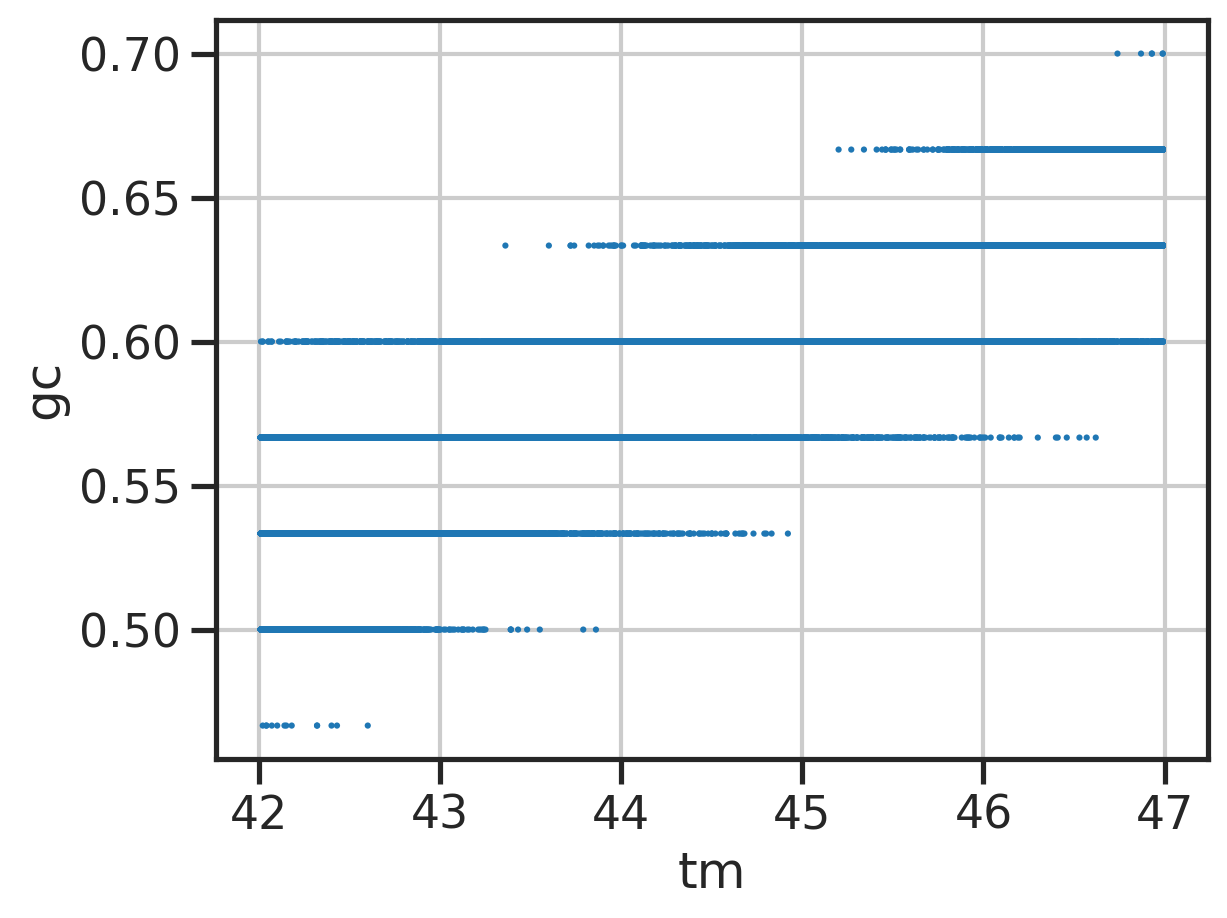

In [9]:
sns.scatterplot(data=dfnew, x='tm', y='gc', edgecolor='none', s=5) 

<AxesSubplot:xlabel='onscore', ylabel='offscore'>

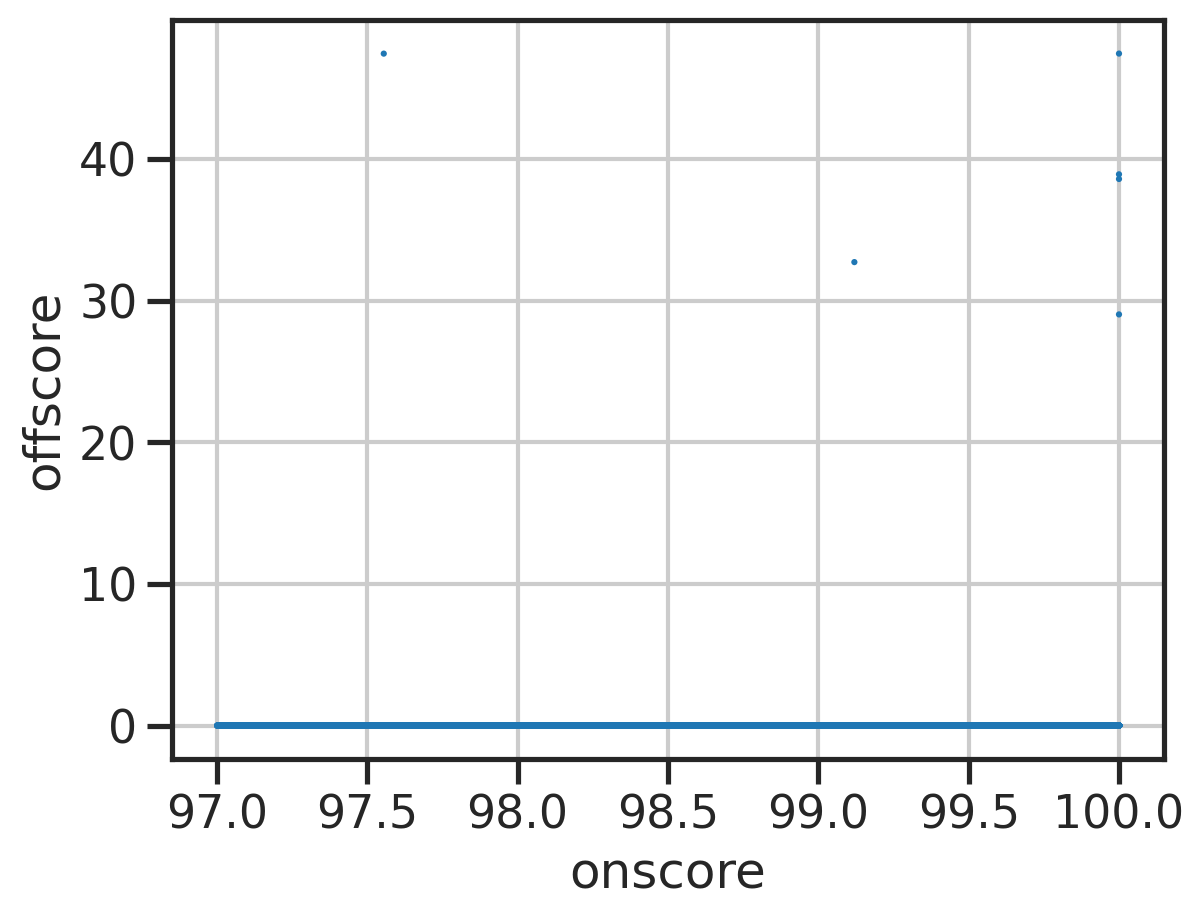

In [10]:
sns.scatterplot(data=dfnew, x='onscore', y='offscore', edgecolor='none', s=5) 

<AxesSubplot:xlabel='onscore', ylabel='prob'>

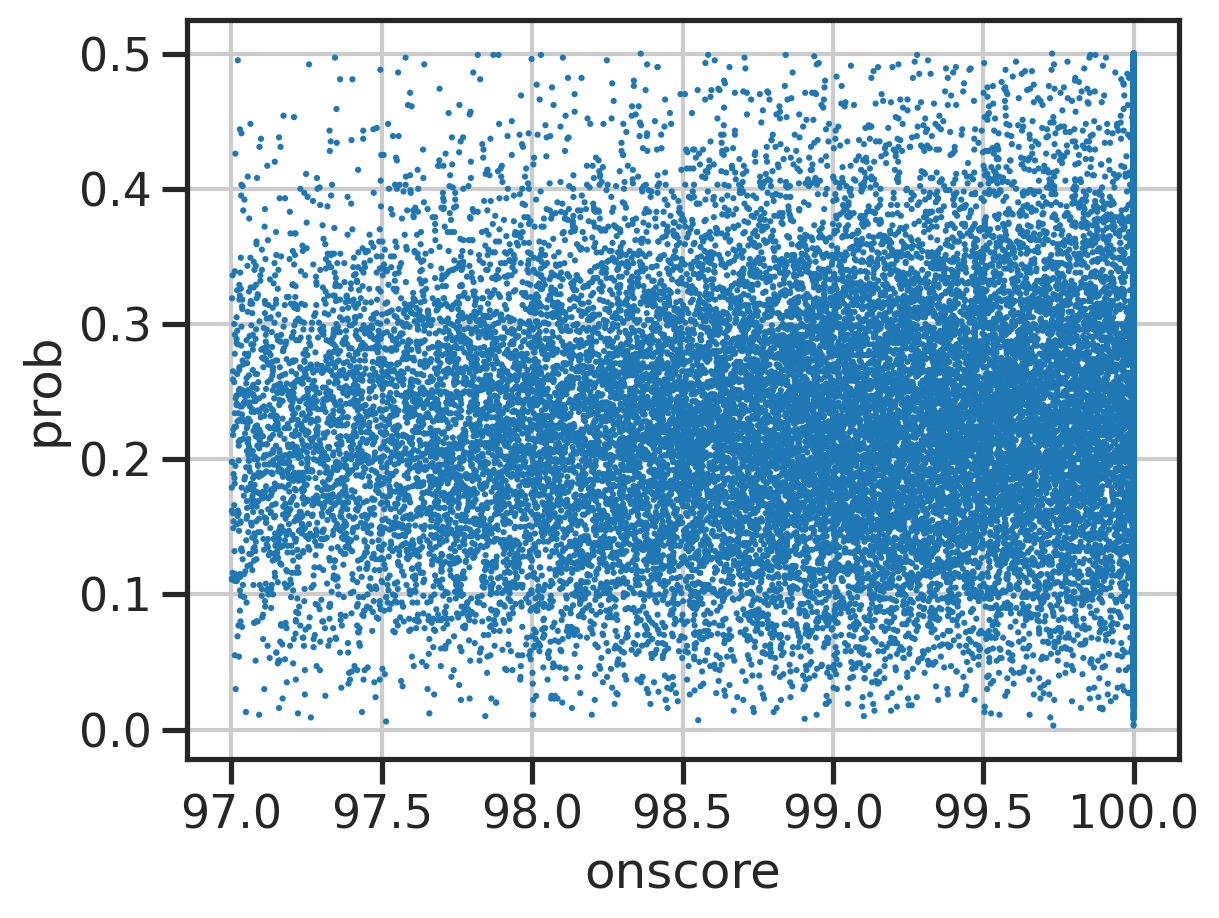

In [11]:
sns.scatterplot(data=dfnew, x='onscore', y='prob', edgecolor='none', s=5) 

In [12]:
gene_cnstrnts = df.groupby('gname').size()
gene_cnstrnts_new = dfnew.groupby('gname').size()# .reindex(gene_constraints.index)

# cnstrnts = pd.DataFrame(gene_cnstrnts)
# cnstrnts = cnstrnts.join(gene_cnstrnts_v3.to_frame())
# cnstrnts = cnstrnts.join(gene_cnstrnts_v3.to_frame())
# cnstrnts

In [13]:
cnstrnts = pd.DataFrame(gene_cnstrnts)
cnstrnts = cnstrnts.join(pd.DataFrame(gene_cnstrnts_new).rename(columns={0:1}))
cnstrnts = cnstrnts.fillna(0).astype(int)
cnstrnts

,0,1
gname,,
1600012P17Rik,27,20
1700001G17Rik,20,14
1700003I22Rik,7,6
1700007P06Rik,13,3
1700016C15Rik,6,6
...,...,...
Zfp281,39,33
Zfp451,2,2
Zfp648,55,52


Text(0, 0.5, 'Num. probes')

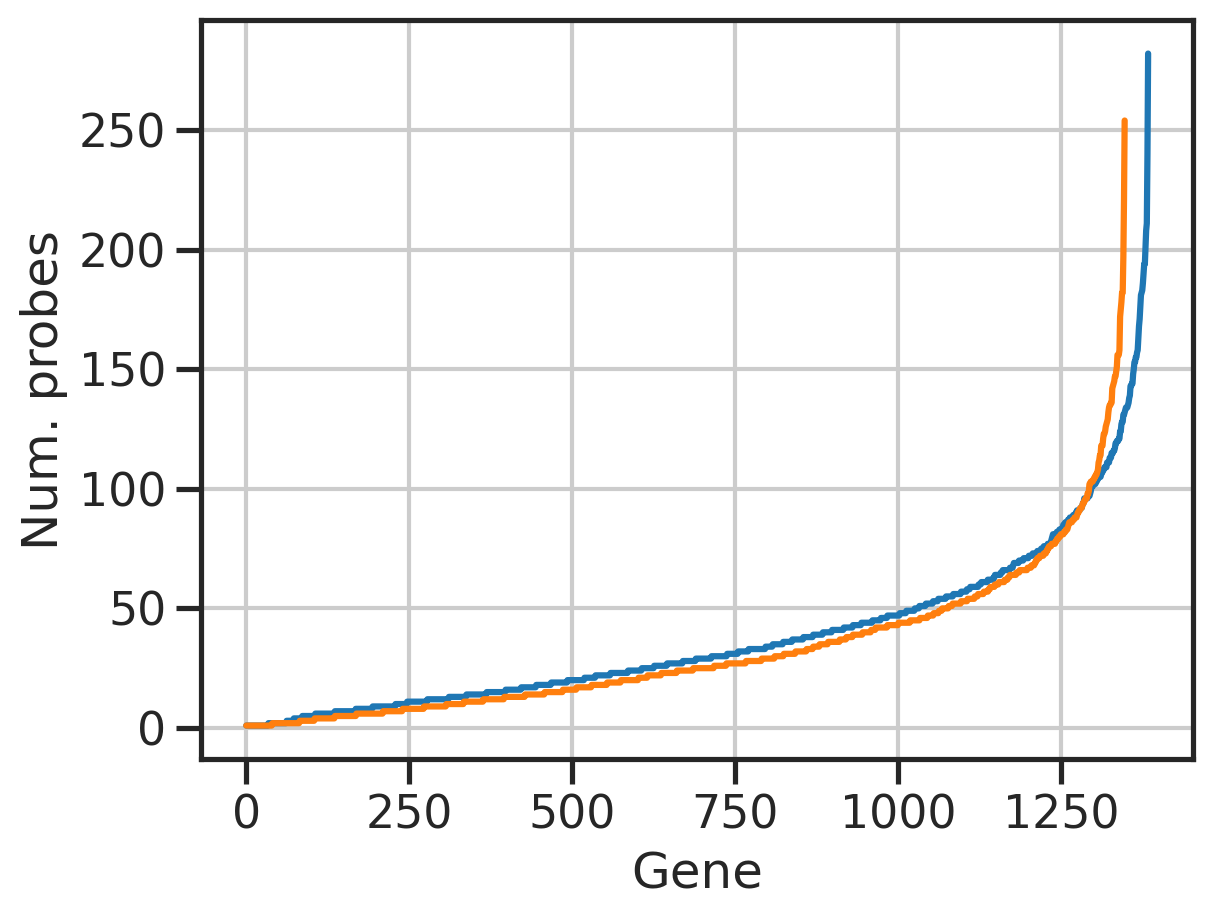

In [14]:
plt.plot(np.sort(gene_cnstrnts))
plt.plot(np.sort(gene_cnstrnts_new))
plt.xlabel('Gene')
plt.ylabel('Num. probes')

Text(0, 0.5, 'Num. probes')

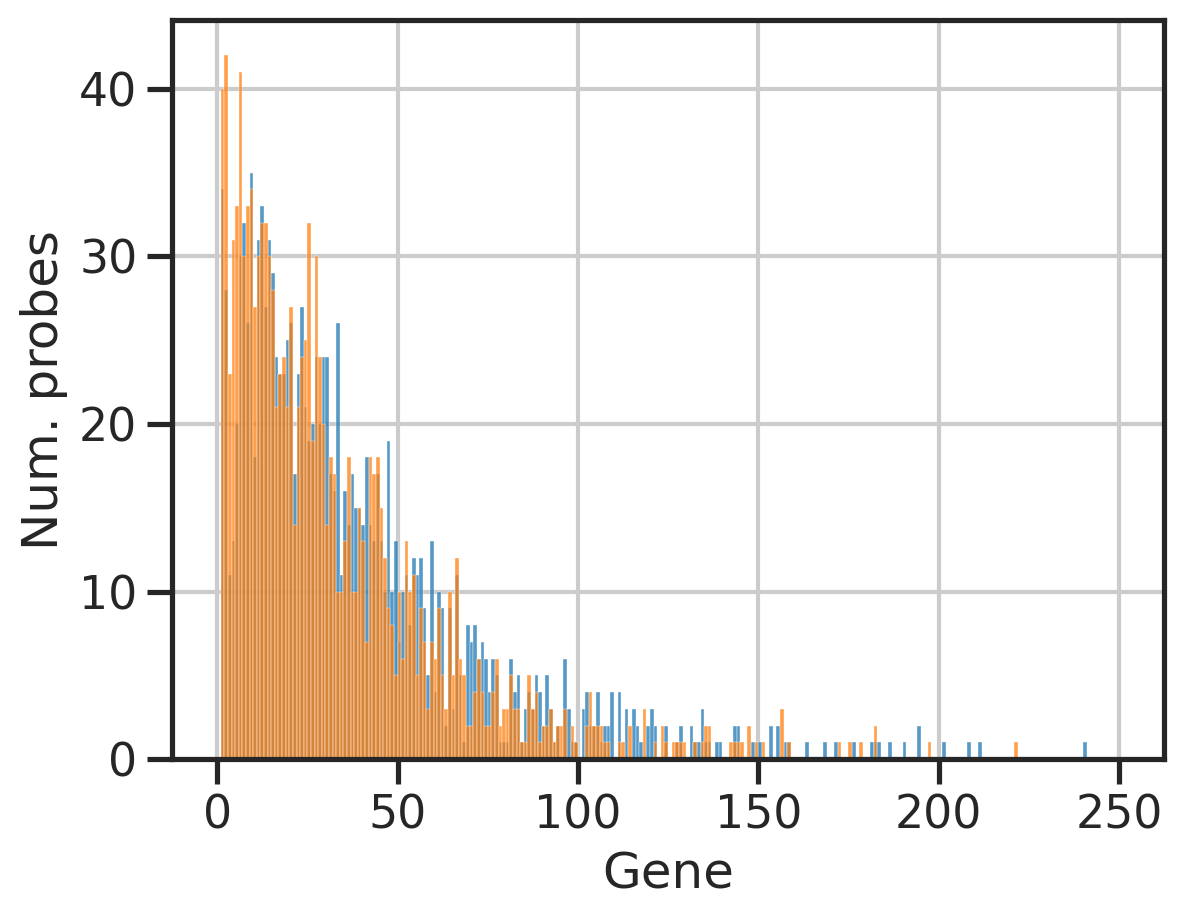

In [15]:
sns.histplot(np.sort(gene_cnstrnts),     color='C0', bins=np.linspace(0,250,251))
sns.histplot(np.sort(gene_cnstrnts_new), color='C1', bins=np.linspace(0,250,251))
plt.xlabel('Gene')
plt.ylabel('Num. probes')

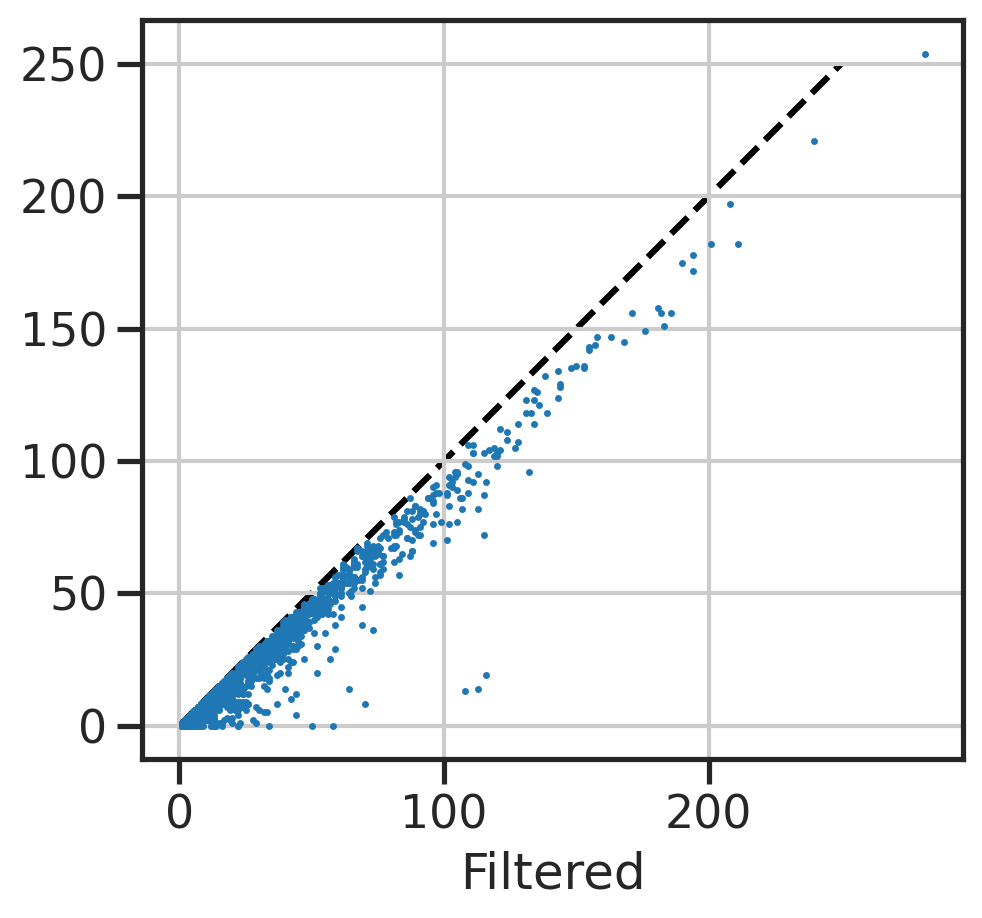

In [16]:
fig, ax = plt.subplots()
ax.scatter(cnstrnts[0], cnstrnts[1], s=1)
ax.plot([0,250], [0,250], '--k', zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Raw')
ax.set_xlabel('Filtered')
plt.show()

In [17]:
dfviz = df.iloc[:10000].copy()
dfviz['dfttm'] = dfviz['seq'].apply(lambda x: recalc_tm(x, fmd=50, Na=390, dnac1=25, dnac2=25))
dfviz['ourtm'] = dfviz['seq'].apply(lambda x: recalc_tm(x, fmd=30, Na=300, dnac1=2,  dnac2=0.001))
dfviz['mattm'] = dfviz['seq'].apply(lambda x: recalc_tm(x, fmd=0,  Na=300, dnac1=2,  dnac2=2)) 
dfviz

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc,dfttm,ourtm,mattm
0,chr1,3214521,3214550,TGACCAAGGACACCGAAAACAGAAAGCGGG,42.59,99.052,0.0,0,0.502,0,+,Xkr4,1,30,0.533333,42.589093,52.361577,71.179513
1,chr1,3214634,3214663,AGCTGATGGAGTGGTAAGCCCTCAAGCAGT,42.83,98.987,0.0,0,0.279,0,+,Xkr4,1,30,0.533333,42.826516,52.513870,71.314019
2,chr1,3214882,3214911,ATTTGGCACTCGAAAGATGTGGCACGTGGT,42.67,100.000,0.0,0,0.192,0,+,Xkr4,1,30,0.500000,42.665785,52.431509,71.248030
3,chr1,3214924,3214953,ACCTGCTGACCCATGTCATTCTGCACCTGG,43.76,100.000,0.0,0,0.277,0,+,Xkr4,1,30,0.566667,43.756240,53.467755,72.272928
4,chr1,3214993,3215022,TAGTCCCTGTTCCTCTCCTGTGGCTCTGTG,42.13,99.877,0.0,0,0.525,0,+,Xkr4,1,30,0.566667,42.133550,51.838190,70.641965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr1,59211347,59211376,TGAGAGACAAGGCCCCAGCTTCATAGGTGG,42.85,99.448,0.0,0,0.294,0,+,Als2,3,30,0.566667,42.851320,52.543807,71.345028
9996,chr1,59211377,59211406,CAGCCACTCTGACACCAACAGCAGATGCAC,42.97,100.000,0.0,0,0.230,0,+,Als2,3,30,0.566667,42.972806,52.772582,71.596212
9997,chr1,59211407,59211436,AGGAGACCACCAAGCTGTTGAGGGCTGAGG,44.64,98.982,0.0,0,0.185,0,+,Als2,3,30,0.600000,44.642915,54.326704,73.126066
9998,chr1,59215115,59215144,GGCTTTTCTCCAGGCTCATGGTTCTCCCTC,42.11,100.000,0.0,0,0.368,0,+,Als2,3,30,0.566667,42.114683,51.845945,70.655281


Text(0, 0.5, 'our setting TM')

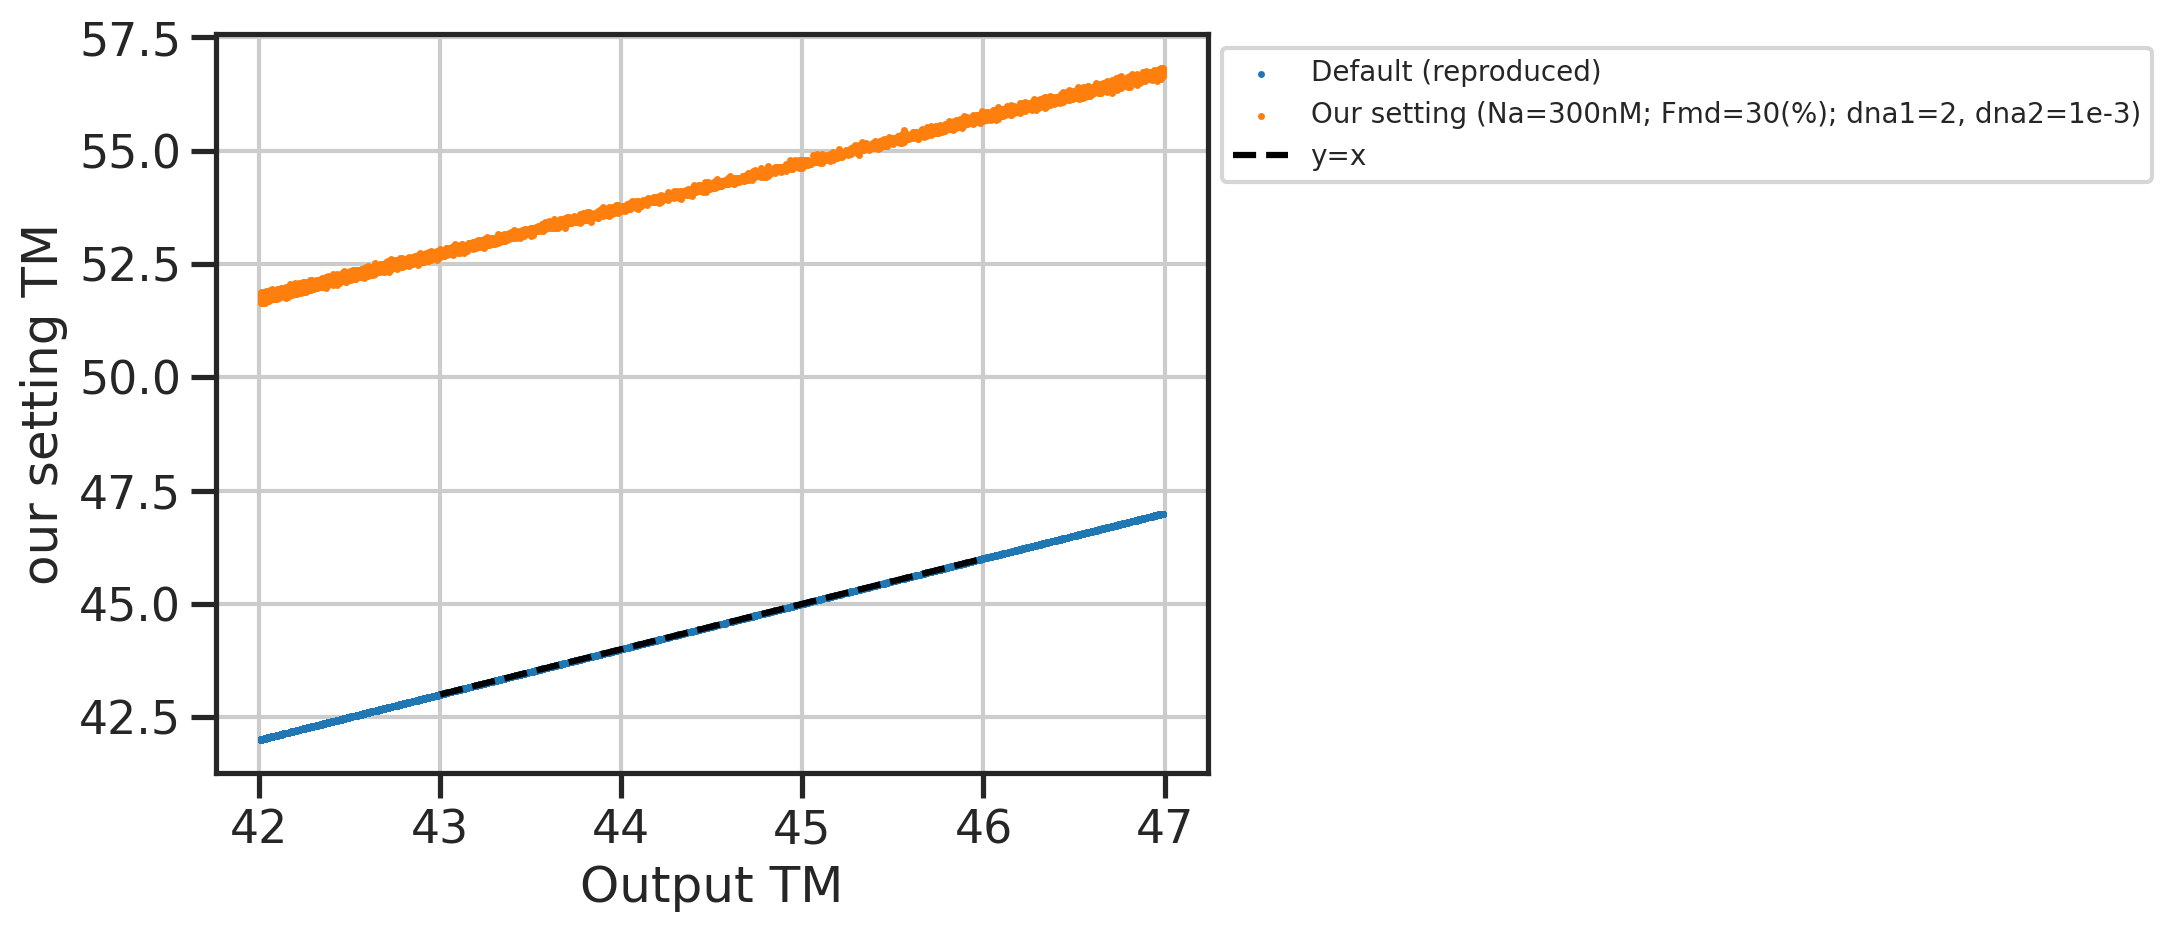

In [18]:
plt.scatter(dfviz['tm'].values, 
            dfviz['dfttm'].values,
            s=1,
            label="Default (reproduced)",
            ) 
plt.scatter(dfviz['tm'].values, 
            dfviz['ourtm'].values,
            s=1,
            label="Our setting (Na=300nM; Fmd=30(%); dna1=2, dna2=1e-3)",
            ) 
plt.plot([43,46], [43,46], '--k', label='y=x')
plt.legend(bbox_to_anchor=(1,1), fontsize=10)
plt.xlabel("Output TM")
plt.ylabel("our setting TM")

Text(0, 0.5, 'Diff')

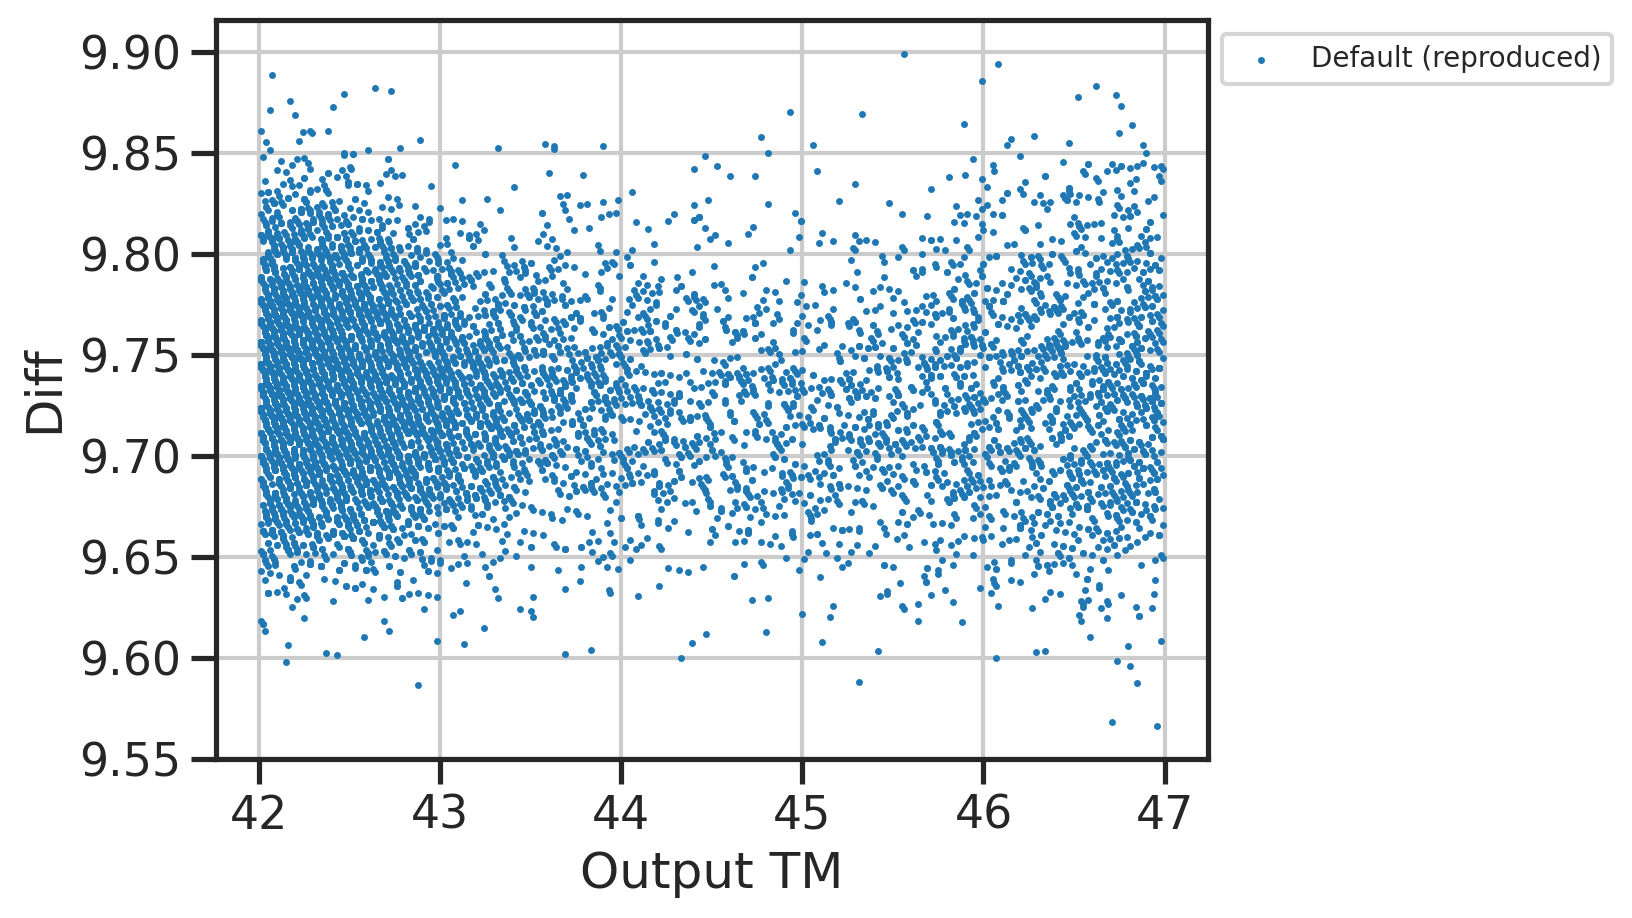

In [22]:
plt.scatter(dfviz['tm'].values, 
            dfviz['ourtm'].values - dfviz['dfttm'].values,
            s=1,
            label="Default (reproduced)",
            ) 
plt.legend(bbox_to_anchor=(1,1), fontsize=10)
plt.xlabel("Output TM")
plt.ylabel("Diff")